<a href="https://colab.research.google.com/github/VittorioBartolomeoSecondin/DVIS-CAValli_Team/blob/main/Assignment1%20-%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration and pre-processing

## Importing libraries and connecting to Google Drive

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv

from google.colab import drive
drive.mount('/content/drive') # turned out to be a good workaround to load a huge amount of data and keep it available

Mounted at /content/drive


## Reading the data

Each dataset file contains several items associated with cities that do not correspond to the main one, that is the one giving the name to the .csv file, but they are in practice <ins>small towns supposed to be clustering in a restricted neighbourhood enclosing the main city</ins>.

Since these small towns have very few occurrences of trees, **we decide to take into account only the main city** (denoted by the attribute *greater_metro* in the dataset) to derive some aggregated information.

In [2]:
all_files = glob.glob("/content/drive/MyDrive/tree_dataset/*.csv") # all .csv files
all_files.sort() # imposing a given order
print(all_files)

['/content/drive/MyDrive/tree_dataset/Albuquerque_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Anaheim_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Arlington_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Atlanta_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/AuroraCO_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Austin_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Baltimore_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Boston_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Buffalo_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/CapeCoral_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/ColoradoSprings_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Columbus_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Dallas_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Denver_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_da

In [4]:
list_of_df = []

for filename in all_files:
    df = pd.read_csv(filename, low_memory=False)
    if list_of_df:
        df = df.reindex(columns=list_of_df[0].columns)
    list_of_df.append(df)

tree_dataset = pd.concat(list_of_df, axis=0, ignore_index=True)

## Analysing dataset size and null values

In [5]:
print(tree_dataset.shape) # N=5660237, 28 columns expected

(5660237, 28)


The total amount of trees is **5,660,237** (as reported in the introduction on Kaggle) and not 5,132,890 as specified in *README_Dryad.txt* file.


In [6]:
tree_dataset.isnull().sum()

most_recent_observation             2127842
most_recent_observation_type        3198777
common_name                          892476
scientific_name                      529297
city                                    505
state                                    31
longitude_coordinate                 751709
latitude_coordinate                  751578
address                             1254389
condition                           3038500
height_M                            4951094
native                                    0
height_binned_M                     4996887
diameter_breast_height_binned_CM    1574755
greater_metro                             0
city_ID                             2017770
tree_ID                             5660237
planted_date                        5213598
retired_date                        5658047
location_type                       3469760
zipcode                             4768676
neighborhood                        5132935
location_name                   

In [7]:
tree_dataset[tree_dataset['state'].isna()]

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,...,retired_date,location_type,zipcode,neighborhood,location_name,ward,district,overhead_utility,diameter_breast_height_CM,percent_population
746,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1863,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1864,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1865,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1866,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1867,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only 31 records, that are crammed in the *Albuquerque_Final_2022-06-18.csv* file, **have a null value in the column named *state***. In this case the state can be easily inferred and therefore specified in each of these rows in place of such a null value.

In [8]:
tree_dataset['state'] = tree_dataset['state'].fillna("New Mexico")

In [9]:
tree_dataset.isnull().sum()

most_recent_observation             2127842
most_recent_observation_type        3198777
common_name                          892476
scientific_name                      529297
city                                    505
state                                     0
longitude_coordinate                 751709
latitude_coordinate                  751578
address                             1254389
condition                           3038500
height_M                            4951094
native                                    0
height_binned_M                     4996887
diameter_breast_height_binned_CM    1574755
greater_metro                             0
city_ID                             2017770
tree_ID                             5660237
planted_date                        5213598
retired_date                        5658047
location_type                       3469760
zipcode                             4768676
neighborhood                        5132935
location_name                   

We decide to retain **only those columns whose number of null values is lower than 88% of the total amount of observations**.

In [10]:
filtered_columns = tree_dataset.columns[tree_dataset.isnull().sum() < 0.88 * tree_dataset.shape[0]]
tree_dataset = tree_dataset[filtered_columns]

In [11]:
tree_dataset['location_type'].value_counts()

no_info              1160294
built_environment     604270
green_space           425901
<null>                    12
Name: location_type, dtype: int64

For visualisation purposes, we decided to replace all occurrences of null values (in any format) stored by the column named *location_type* with the value *no_info*.

In [12]:
tree_dataset['location_type'] = tree_dataset['location_type'].fillna("no_info")
tree_dataset['location_type'] = tree_dataset['location_type'].replace('<null>', "no_info")
tree_dataset['location_type'].value_counts()

no_info              4630066
built_environment     604270
green_space           425901
Name: location_type, dtype: int64

In [13]:
tree_dataset.isnull().sum() # final count of null values

most_recent_observation             2127842
most_recent_observation_type        3198777
common_name                          892476
scientific_name                      529297
city                                    505
state                                     0
longitude_coordinate                 751709
latitude_coordinate                  751578
address                             1254389
condition                           3038500
height_M                            4951094
native                                    0
diameter_breast_height_binned_CM    1574755
greater_metro                             0
city_ID                             2017770
location_type                             0
zipcode                             4768676
diameter_breast_height_CM           2785979
dtype: int64

In [14]:
print(tree_dataset.shape) # final shape

(5660237, 18)


Note that the final dataset is composed by the following features:


*   **quantitative features**: *most_recent_observation, longitude_coordinate, latitude_coordinate, height_M, diameter_breast_height_binned_CM, city_ID, diameter_breast_height_CM*;
*   **qualitative features**: *most_recent_observation_type, common_name, scientific_name, city, state, address, condition, native, greater_metro, location_type, zipcode*.

## Inspecting variables

### *scientific_name* and *common_name*

In [15]:
tree_dataset['scientific_name'].value_counts()

Platanus acerifolia        217762
Lagerstroemia indica       207061
Acer platanoides           198951
Gleditsia triacanthos      167242
Pyrus calleryana           159981
                            ...  
Persea palustris                1
Acer henryi                     1
Maackia chinensis               1
Castanospermum australe         1
Red Sea                         1
Name: scientific_name, Length: 1965, dtype: int64

In [16]:
tree_dataset['common_name'].value_counts()

Norway maple                142560
London planetree            122493
Red maple                   121825
Crape myrtle                121775
ok to plant vacant          113631
                             ...  
Cotton candy magnolia            1
Summer chocolate mimosa          1
Eastern whitebud                 1
Coralcole crabapple              1
Flowering nectarine tree         1
Name: common_name, Length: 4463, dtype: int64

Some annotations in these fields are inconsistent (we also checked the original .csv files for such inconsistencies).

For instance, see the entries *Firmiana simplex) chinese parasoltree* and *ok to plant vacant*. We're going to correct the first mistake, we just need to split the value in scientific name and common name as separate fields.

In [17]:
Firmiana_trees = tree_dataset.loc[tree_dataset['scientific_name']=='Firmiana simplex']
Firmiana_trees

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,height_M,native,diameter_breast_height_binned_CM,greater_metro,city_ID,location_type,zipcode,diameter_breast_height_CM
43155,NaN,NaN,Chinese parasol tree,Firmiana simplex,Anaheim,California,-117.924000,33.849540,2 La Palma Park,NaN,NaN,introduced,15.24 to 30.48 cm,Anaheim,NaN,no_info,NaN,NaN
94615,NaN,NaN,NaN,Firmiana simplex,Arlington,Texas,-97.160204,32.659442,NaN,NaN,NaN,introduced,NaN,Arlington,NaN,no_info,NaN,NaN
201834,NaN,NaN,Chinese parasol tree,Firmiana simplex,Austin,Texas,-97.746139,30.275258,500 W 12th St,good,75.45932,introduced,0 to 15.24 cm,Austin,24911,no_info,NaN,7.620
321922,07/10/2018,NaN,Chinese parasoltree,Firmiana simplex,Baltimore,Maryland,-76.653563,39.353561,4915 Greenspring Ave,NaN,98.42520,introduced,0 to 15.24 cm,Baltimore,416189,no_info,NaN,13.970
321941,07/10/2018,NaN,Chinese parasoltree,Firmiana simplex,Baltimore,Maryland,-76.653512,39.353563,4915 Greenspring Ave,NaN,98.42520,introduced,0 to 15.24 cm,Baltimore,416208,no_info,NaN,9.398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705820,NaN,NaN,Chinese parasol tree,Firmiana simplex,New Orleans,Louisiana,NaN,NaN,NaN,NaN,NaN,introduced,NaN,NewOrleans,NaN,no_info,NaN,NaN
2705821,NaN,NaN,Chinese parasol tree,Firmiana simplex,New Orleans,Louisiana,NaN,NaN,NaN,NaN,NaN,introduced,NaN,NewOrleans,NaN,no_info,NaN,NaN
2705822,NaN,NaN,Chinese parasol tree,Firmiana simplex,New Orleans,Louisiana,NaN,NaN,NaN,NaN,NaN,introduced,NaN,NewOrleans,NaN,no_info,NaN,NaN
2705823,NaN,NaN,Chinese parasol tree,Firmiana simplex,New Orleans,Louisiana,NaN,NaN,NaN,NaN,NaN,introduced,NaN,NewOrleans,NaN,no_info,NaN,NaN


Here we find other inconsistencies, note the value *Chinese parasol* and the values *Chinese parasol tree* and *Chinese parasoltree*, which would all denote the same entity in the column named *common_name*.

In [18]:
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Firmiana simplex) chinese parasoltree', "Chinese parasol tree")
tree_dataset.loc[tree_dataset['scientific_name'] == 'Firmiana simplex', ['common_name']] = 'Chinese parasol tree'
tree_dataset.loc[tree_dataset['common_name'] == 'Chinese parasol tree', ['scientific_name']] = 'Firmiana simplex'

In [19]:
Firmiana_trees = tree_dataset.loc[tree_dataset['scientific_name']=='Firmiana simplex'] # see the result
Firmiana_trees

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,height_M,native,diameter_breast_height_binned_CM,greater_metro,city_ID,location_type,zipcode,diameter_breast_height_CM
43155,NaN,NaN,Chinese parasol tree,Firmiana simplex,Anaheim,California,-117.924000,33.849540,2 La Palma Park,NaN,NaN,introduced,15.24 to 30.48 cm,Anaheim,NaN,no_info,NaN,NaN
94615,NaN,NaN,Chinese parasol tree,Firmiana simplex,Arlington,Texas,-97.160204,32.659442,NaN,NaN,NaN,introduced,NaN,Arlington,NaN,no_info,NaN,NaN
201834,NaN,NaN,Chinese parasol tree,Firmiana simplex,Austin,Texas,-97.746139,30.275258,500 W 12th St,good,75.45932,introduced,0 to 15.24 cm,Austin,24911,no_info,NaN,7.620
321922,07/10/2018,NaN,Chinese parasol tree,Firmiana simplex,Baltimore,Maryland,-76.653563,39.353561,4915 Greenspring Ave,NaN,98.42520,introduced,0 to 15.24 cm,Baltimore,416189,no_info,NaN,13.970
321941,07/10/2018,NaN,Chinese parasol tree,Firmiana simplex,Baltimore,Maryland,-76.653512,39.353563,4915 Greenspring Ave,NaN,98.42520,introduced,0 to 15.24 cm,Baltimore,416208,no_info,NaN,9.398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705821,NaN,NaN,Chinese parasol tree,Firmiana simplex,New Orleans,Louisiana,NaN,NaN,NaN,NaN,NaN,introduced,NaN,NewOrleans,NaN,no_info,NaN,NaN
2705822,NaN,NaN,Chinese parasol tree,Firmiana simplex,New Orleans,Louisiana,NaN,NaN,NaN,NaN,NaN,introduced,NaN,NewOrleans,NaN,no_info,NaN,NaN
2705823,NaN,NaN,Chinese parasol tree,Firmiana simplex,New Orleans,Louisiana,NaN,NaN,NaN,NaN,NaN,introduced,NaN,NewOrleans,NaN,no_info,NaN,NaN
3527996,7/7/2016,inventory_date,Chinese parasol tree,Firmiana simplex,Oklahoma City,Oklahoma,-97.505734,35.461551,NaN,NaN,78.74016,no_info,15.24 to 30.48 cm,OklahomaCity,NaN,no_info,NaN,21.082


Here, we decided to replace all occurrences of *Unassigned* stored by the column named *scientific_name* with the null value.

In [20]:
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Unassigned', None)

### *height_M*

In [ ]:
tree_dataset['height_M'].isnull().sum()

In [ ]:
tree_dataset['height_M'].sort_values(ascending=True).to_frame()

In [ ]:
print(tree_dataset['height_M'].max())
print(tree_dataset['height_M'].min())

In [ ]:
tree_dataset['height_M'] = tree_dataset['height_M'].apply(lambda x: x if x > 0 else None)

In [ ]:
tree_dataset['height_M'].isnull().sum()

### *diameter_breast_height_CM*

In [ ]:
tree_dataset['diameter_breast_height_CM'].isnull().sum()

In [ ]:
tree_dataset['diameter_breast_height_CM'].sort_values(ascending=True).to_frame()

In [ ]:
print(tree_dataset['diameter_breast_height_CM'].max())
print(tree_dataset['diameter_breast_height_CM'].min())

In [ ]:
tree_dataset['diameter_breast_height_CM'] = tree_dataset['diameter_breast_height_CM'].apply(lambda x: x if x > 0 else None)

In [ ]:
tree_dataset['diameter_breast_height_CM'].isnull().sum()

## Towards data visualisation

The following horizontal bar chart shows **the ten most frequent tree species in the dataset** according to their scientific names.

<Axes: >

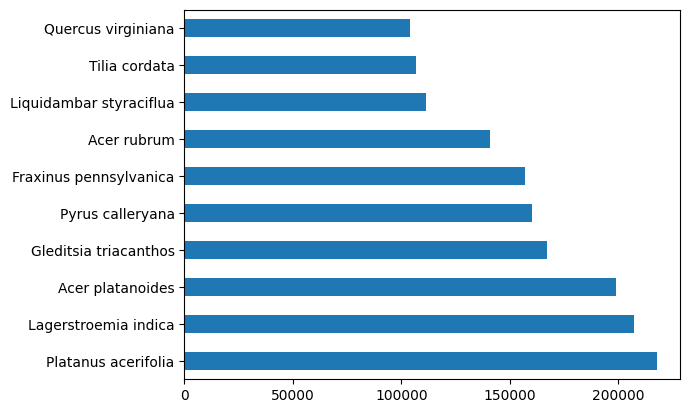

In [21]:
count_species = tree_dataset['scientific_name'].value_counts().sort_values(ascending=False).head(10) # excludes NA by default
count_species.plot(kind='barh')

In [ ]:
labels, counts = list(count_species.index), list(count_species.values)
print(labels)
print(counts)

In [ ]:
common_names = []
for scientific_name in list(count_species.index):
  scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
  common_names.append(list(scientific_subset['common_name'].value_counts().index)[0])

print(common_names)

In [ ]:
print("Mean on the specified amount of values")
height_values = []

for scientific_name in list(count_species.index):
  scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
  print(round(scientific_subset["height_M"].mean(), 2), "\t", scientific_subset["height_M"].shape[0])
  height_values.append(round(scientific_subset["height_M"].mean(), 2))

print(height_values)

In [ ]:
additional_variables = np.column_stack((common_names, height_values))
print(additional_variables)

In [ ]:
def create_csv(csv_name, header, variables, additional_variables):

  """
  csv_name: name of the .csv file to be created
  header: names of fields in the .csv file
  variables: labels and counts to be visualized in a single plot
  additional_variables: information to be displayed through interaction
  """

  with open(csv_name, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    labels, counts = list(dataframe.values[:, 0]), list(dataframe.values[:, 1])

    for i in range(len(labels)):
      #print(additional_variables[i])
      data = [labels[i], counts[i]]
      for add_var in additional_variables[i]:
        data.append(add_var)

      # write the data
      writer.writerow(data)

### Now we create the same visualization but, instead of the whole dataset, we divide it for each city

In [ ]:
# Create a dictionary
count_species_per_city = {}

unique_cities = tree_dataset['greater_metro'].unique()

# Iterate through each city and compute the top 10 scientific names
for city in unique_cities:
    city_data = tree_dataset[tree_dataset['greater_metro'] == city]
    count_species = city_data['scientific_name'].value_counts().reset_index()
    count_species.columns = ['scientific_name', 'count']
    count_species = count_species.sort_values(by='count', ascending=False).head(10)

    # Store the result in the dictionary with the city name as the key
    count_species_per_city[city] = count_species

#print(count_species_per_city)

In [ ]:
for city, dataframe in count_species_per_city.items():
  common_names = []
  height_values = []

  for scientific_name, count in list(dataframe.values):
    scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
    common_names.append(list(scientific_subset['common_name'].value_counts().index)[0])

    #print(round(scientific_subset["height_M"].mean(), 2), "\t", scientific_subset["height_M"].shape[0])
    height_values.append(round(scientific_subset["height_M"].mean(), 2))
  #print(common_names)
  additional_variables = np.column_stack((common_names, height_values))
  print(additional_variables)
  print("\n")
  create_csv(str(city) + '.csv', ['scientific_name', 'count', 'common_name', 'avg_height'], dataframe, additional_variables)


In [ ]:
# Now, 'results' is a dictionary where each key is a city name, and each value is a DataFrame
count_species_per_city

In [ ]:
print(list(dataframe.values[:, 0]))
print(list(dataframe.values[:, 1]))

In [ ]:
"""
header = ['name', 'count']

with open('barchart_1.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    for i in range(len(unique_values)):
      data = [unique_values[i], counts[i]]

      # write the data
      writer.writerow(data)
      """

In [ ]:
tree_dataset['state'].value_counts()

In [ ]:
california_trees = tree_dataset.loc[tree_dataset['state']=='California']

In [ ]:
california_trees['scientific_name'].value_counts()

In [ ]:
california_trees['city'].value_counts()

In [ ]:
top_cities = ['Los Angeles', 'San Jose', 'San Diego', 'San Francisco', 'Stockton']
top_cities_trees = california_trees.loc[california_trees['city'].isin(top_cities)]

In [ ]:
top_species = ['Platanus acerifolia', 'Lagerstroemia indica', 'Acer platanoides', 'Gleditsia triacanthos', 'Pyrus calleryana']
top_cities_top_trees = top_cities_trees.loc[top_cities_trees['scientific_name'].isin(top_species)]

In [ ]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in top_cities:
    tree_counts.append(top_cities_top_trees.loc[(top_cities_top_trees['scientific_name'] == species) & (top_cities_top_trees['city'] == city)].shape[0])
  if (len(tree_counts)==len(top_cities)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

In [ ]:
cities = tuple(top_cities)

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(top_species), figsize=(14, 4), sharex=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_species)))

for i, (species, color) in enumerate(zip(top_species, colors)):
    species_data = top_cities_top_trees[top_cities_top_trees['scientific_name'] == species]

    for j, city in enumerate(top_cities):
        city_data = species_data[species_data['city'] == city]
        count = city_data.shape[0]

        # Create a horizontal bar for the current city in the current species
        ax = axes[i]
        ax.barh(city, count, label=city, color=color)

    ax.set_title(species)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(top_species), figsize=(14, 4))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_species)))

for i, (species, color) in enumerate(zip(top_species, colors)):
    species_data = top_cities_top_trees[top_cities_top_trees['scientific_name'] == species]

    for j, city in enumerate(top_cities):
        city_data = species_data[species_data['city'] == city]
        count = city_data.shape[0]

        # Create a horizontal bar for the current city in the current species
        ax = axes[i]
        ax.barh(city, count, label=city, color=color)

    ax.set_title(species)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(top_species), figsize=(14, 4), sharex=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_species)))

for i, (species, color) in enumerate(zip(top_species, colors)):
    species_data = top_cities_top_trees[top_cities_top_trees['scientific_name'] == species]

    for j, city in enumerate(top_cities):
        city_data = species_data[species_data['city'] == city]
        count = city_data.shape[0]

        # Create a horizontal bar for the current city in the current species
        ax = axes[i]
        ax.barh(city, count, label=city, color=color)
        ax.text(count, j, str(count), ha='left', va='center', color='black')

    ax.set_title(species)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [22]:
california_trees = tree_dataset.loc[tree_dataset['state']=='California']

In [23]:
california_trees['scientific_name'].value_counts()

Lagerstroemia indica       101245
Platanus acerifolia         96084
Liquidambar styraciflua     77900
Washingtonia robusta        75159
Magnolia grandiflora        68706
                            ...  
Hermosa                         1
Michelia alba                   1
Benjamina                       1
African Crioceridae             1
Pinus elliottii                 1
Name: scientific_name, Length: 1005, dtype: int64

In [24]:
california_trees['city'].value_counts()

Los Angeles         720140
San Jose            347669
San Diego           212304
San Francisco       188462
Stockton             98300
Sacramento           87191
Rancho Cucamonga     82947
Anaheim              79651
Ontario              58577
Irvine               58364
Huntington Beach     55828
Oakland              38613
Garden Grove         17522
Fresno                6980
Santa Rosa            3016
Name: city, dtype: int64

In [25]:
cities_list = california_trees['city'].unique().tolist()

In [26]:
top_species = ['Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']

In [27]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in cities_list:
    tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['city'] == city)].shape[0])
  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

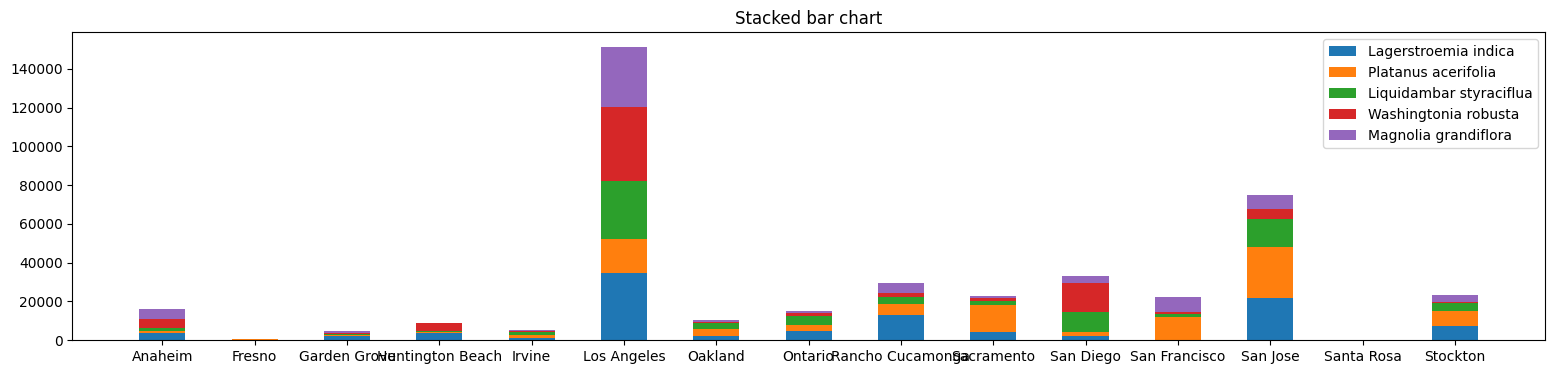

In [29]:
cities = tuple(cities_list)
num_cities = len(cities_list)

width = 0.5

fig, ax = plt.subplots(figsize=(19,4))

bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")

plt.show()


In [67]:
header1 = ['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']

In [68]:
species = ['Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']
header2 = ['city']
for scientific_name in species:
    scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
    header2.append(list(scientific_subset['common_name'].value_counts().index)[0])
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia']


In [73]:
header = [header1, header2]

In [74]:
header2 = []

[['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora'], []]


In [83]:
def create_csv_2(csv_name, header, labels, variables):

  """
  csv_name: name of the .csv file to be created
  header: names of fields in the .csv file
  variables: labels and counts to be visualized in a single plot
  additional_variables: information to be displayed through interaction
  """

  with open(csv_name, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    #writer.writerow(header[1])

    for i in range(len(labels)):
      data = [labels[i]]
      for variable in list(variables[i]):
        data.append(variable)

      # write the data
      writer.writerow(data)

In [84]:
create_csv_2('stacked_1.csv', header1, cities_list, np.transpose(list(weight_counts.values())))

In [82]:
print(header1)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']
